# Diferenciação com Log
Prof. Fernando Amaral

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller
from pandas import Series
from datetime import datetime

In [2]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

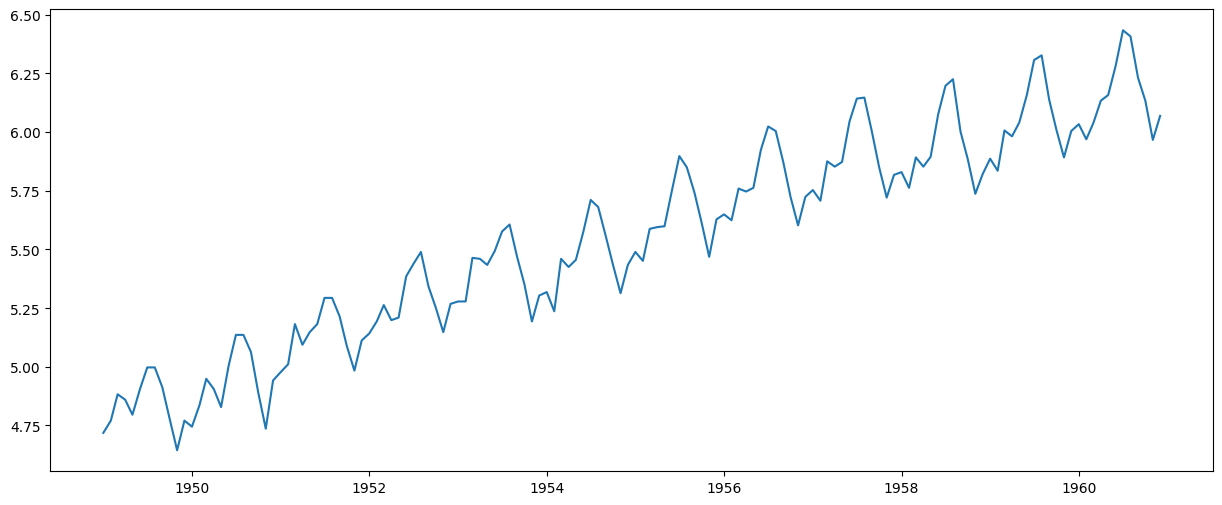

In [3]:
#cálculo do log
indexedDataset_logScale = np.log(data)
plt.plot(indexedDataset_logScale)
plt.show()

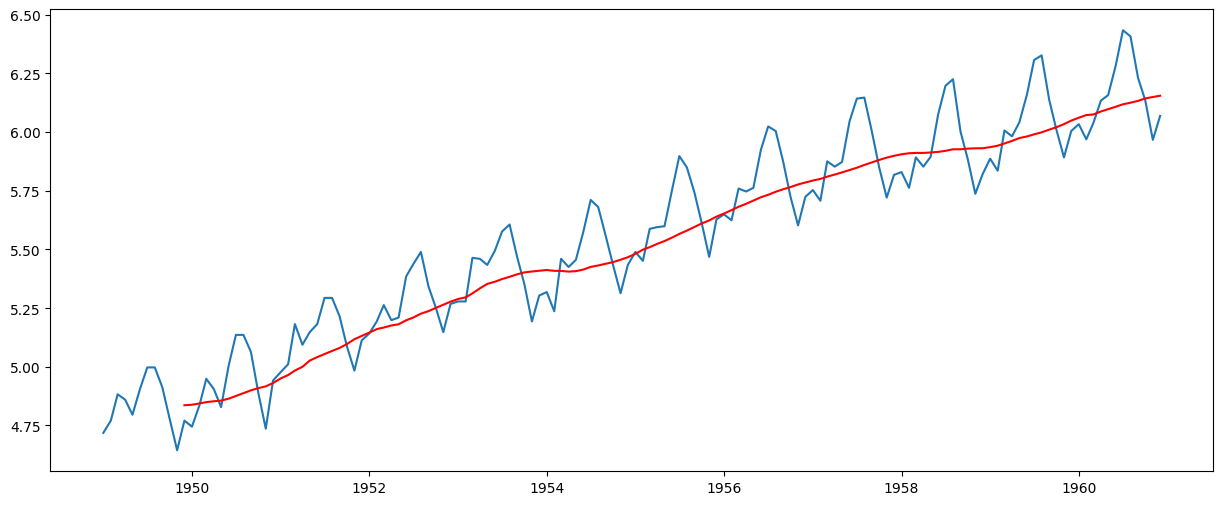

In [4]:
#criamos média móvel aplicado sobre o log
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
#moving average e dados com log aplicado
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')
plt.show()

In [5]:
#subtrair dados do log da média móvel
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [6]:
#precisamos remover os NaN
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
#teste de estacionariedade 
def adf_test(y):
    print('Resutaldo do Teste Dickey-Fuller:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Teste', 'Valor p', '# de lags', '# de observações'])
    for key, value in dftest[4].items():
        dfoutput['Valores Críticos ({})'.format(key)] = value
    print(dfoutput)  

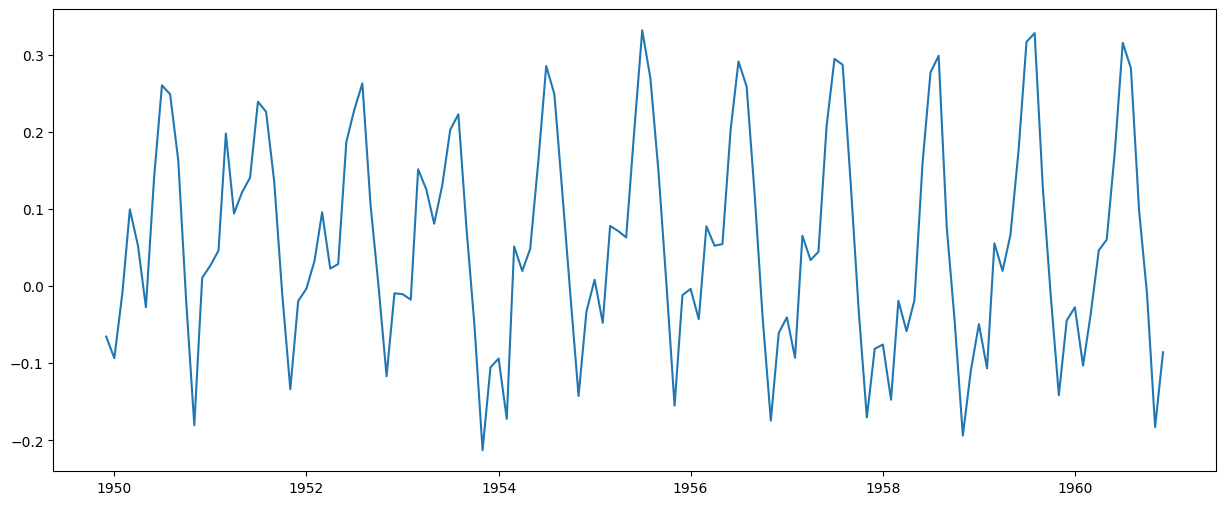

In [9]:
plt.plot(datasetLogScaleMinusMovingAverage, label='Diferenciação')
plt.show()

In [10]:
adf_test(datasetLogScaleMinusMovingAverage)

Resutaldo do Teste Dickey-Fuller:
Teste                      -3.162908
Valor p                     0.022235
# de lags                  13.000000
# de observações          119.000000
Valores Críticos (1%)      -3.486535
Valores Críticos (5%)      -2.886151
Valores Críticos (10%)     -2.579896
dtype: float64
